<a href="https://colab.research.google.com/github/Sreeshbk/binance_datascience/blob/main/tensorflow/L03_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification neural network

A classification problem involves predicting whether something is one thing or another.

Type of Classification:

- Binary classification - there are only two options. e.g Predict whether or not someone has heart disease based on their health parameters.
- Multi-class classification since there are more than two options - 
Decide whether a photo of is of food, a person or a dog. 
- Multi-label classification -a single article could have more than one category assigned.e.g., Predict what categories should be assigned to a Wikipedia article. 


## Typical architecture of a classification neural network


| Hyperparameter | 	Binary Classification | 	Multiclass classification |
| ----------|-----------------|---|
|Input layer shape |	Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) |	Same as binary classification | 
|Hidden layer(s)	|Problem specific, minimum = 1, maximum = unlimited |	Same as binary classification |
| Neurons per hidden layer |	Problem specific, generally 10 to 100	| Same as binary classification |
| Output layer shape	| 1 (one class or the other)	|1 per class (e.g. 3 for food, person or dog photo)|
|Hidden activation |	Usually ReLU (rectified linear unit) |	Same as binary classification|
|Output activation |	Sigmoid	| Softmax|
|Loss function |	Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow) |	Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)|
|Optimizer	|SGD (stochastic gradient descent), Adam |	Same as binary classification|

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

#### sklearn.datasets.make_circle

Make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification algorithms.

In [2]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000
# Create circles with inner circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [3]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
print(f''' Viewing the X[0-10] {X[:10]} and
Y[0-10] {y[:10]}
''')

 Viewing the X[0-10] [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]] and
Y[0-10] [1 1 1 1 0 1 1 1 1 0]



Visualizing my plot


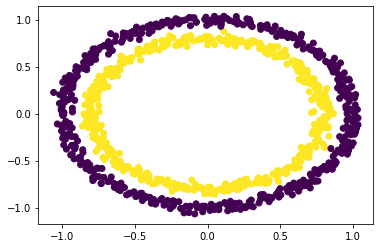

In [5]:
print("Visualizing my plot")
import matplotlib.pyplot as plt
plt.scatter(X[:,0],[X[:,1]],c=y)

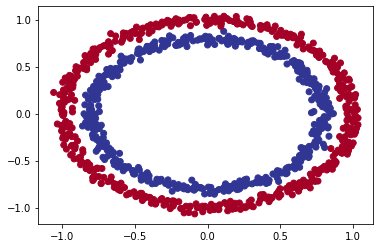

In [6]:
plt.scatter(X[:,0],[X[:,1]],c=y,cmap=plt.cm.RdYlBu)

In [7]:
print(f''' Check out the different labels
 {circles.label.value_counts()}
 This looks like a binary classification where y is either 1 or 0
 or as visualized whether its blue dot or red dot''')

 Check out the different labels
 1    500
0    500
Name: label, dtype: int64
 This looks like a binary classification where y is either 1 or 0
 or as visualized whether its blue dot or red dot


In [8]:
print(f'''the shapes of our features and labels
X.shape {X.shape},
y.shape {y.shape} 
sample size {len(X)}''')

the shapes of our features and labels
X.shape (1000, 2),
y.shape (1000,) 
sample size 1000


## Modelling

- Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
- Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
- Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [9]:
tf.random.set_seed(42)
# Define Model
model_1 = tf.keras.Sequential([
       tf.keras.layers.Dense(1)                       
] )
# Compile model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics="accuracy")
#Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


The Model has accuracy of less than 50%. Let's increase the epochs and find the accuracy

In [10]:
#Training the model for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since the model is getting ~50%, add extra layer

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)                        
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_2.fit(X,y,epochs=100,verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

This model also didnt improve the accuracy.

Common ways of improving the deep learning model:
- Adding layers
- increase number of hidden units
- Change the activation functions
- Change the optimization function
- Change the learning rate
- Fitting on more data
- Fitting for longer

In [12]:
print('Increasing the number of hidden units and changing the optimizer')
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(4),
     tf.keras.layers.Dense(4),
     tf.keras.layers.Dense(1)                         
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X,y,epochs=100,verbose=0)
model_3.summary()

Increasing the number of hidden units and changing the optimizer
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

The model is still runing with accuracy of 50%

Let's make some visualizations to see what's happening

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  #create meshgrid with equally spaced number between min and max
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


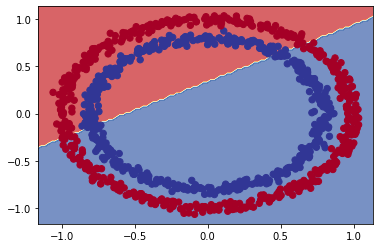

In [15]:
plot_decision_boundary(model_3,X,y)

when we visualize the graph, the model is trying to use linear solution to solve the algorithm, thus resulting in guessing or lower accuracy

Using the activation functions

In [16]:
print('Using linear activation function')
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(4,activation=tf.keras.activations.linear),
     tf.keras.layers.Dense(4,activation=tf.keras.activations.linear),
     tf.keras.layers.Dense(1)                         
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_4.fit(X,y,epochs=100,verbose=0)
model_4.evaluate(X,y)

Using linear activation function
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5130


[0.693151593208313, 0.5130000114440918]

This result is the still having accuracy ~50%. Let's use non linear activation function



In [17]:
print('Using non-linear activation function')
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)                         
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_5.fit(X,y,epochs=100,verbose=0)
model_5.evaluate(X,y)

Using non-linear activation function
32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


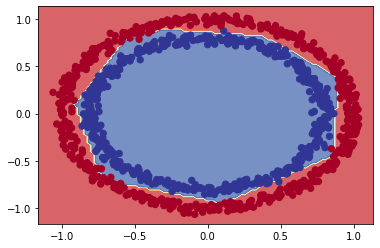

In [18]:
plot_decision_boundary(model_5,X,y)

The model has improved a lot with accuracy 99% 


## Evaluating and improving our classification model

In [19]:
print("Reducing number of epochs t0 50 and adding learning rate of 0.01")
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set


# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_final = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_final.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_final.fit(X_train, y_train, epochs=100,verbose=0)

Reducing number of epochs t0 50 and adding learning rate of 0.01


In [20]:
# Evaluate our model on the test set
loss, accuracy = model_final.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9950
Model loss on the test set: 0.02450874261558056
Model accuracy on the test set: 99.50%


doing binary classifcation...
doing binary classifcation...


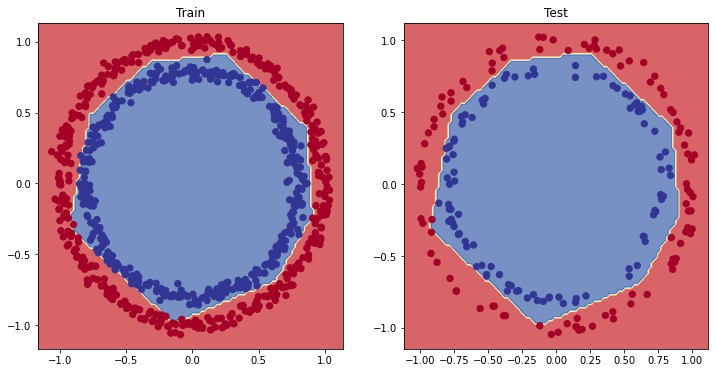

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_final, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_final, X=X_test, y=y_test)
plt.show()

In [23]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
...,...,...
95,0.038384,0.98875
96,0.037549,0.99000
97,0.036139,0.99250
98,0.035137,0.99250


Text(0.5, 1.0, 'Model final training curves')

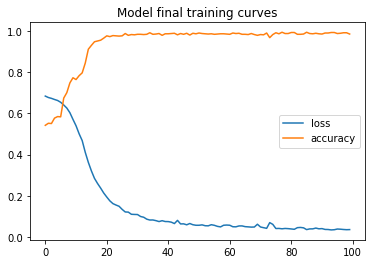

In [24]:

# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model final training curves")